<a href="https://colab.research.google.com/github/ngabo-dev/TrustCheck/blob/main/Summative_Intro_to_ml_%5BJean_Pierre_NIYONGABO%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
#Import Necessary Libraries

# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, log_loss, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.models import load_model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pickle
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


# 📁 Create save directory
os.makedirs("saved_models", exist_ok=True)


# The Dataset
>
***📌 Problem Statement***
The rise of misinformation and fake news online has made it increasingly difficult to identify which news is trustworthy. This project aims to build a machine learning model that can automatically classify news articles as either real or fake.

**📄 Dataset Description**
The dataset used is titled "Fake or Real News", which contains labeled news articles. Each row in the dataset includes:

Title: The headline of the news article

Text: The full news content

Label: Either FAKE or REAL, indicating the truthfulness of the article


In [ ]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)

# Load the dataset
df = pd.read_csv('fake_news_dataset.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataframe
print(df.info())

# Display the value counts of the 'label' column to check for class imbalance
print(df['label'].value_counts())

   id                                              title  \
0   0  education information update community technol...   
1   1  official sports report information update educ...   
2   2       sports update research news education sports   
3   3  event economy government development technolog...   
4   4  culture research health development developmen...   

                                                text label  
0  source community community policy technology g...  real  
1  development technology update government analy...  real  
2  news development technology community source s...  fake  
3  news government economy update analysis govern...  real  
4  community education news news information rese...  real  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   title   20000 non-null  object
 2   text    20000 no

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenize
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Assuming df is your DataFrame loaded from 'fake_news_dataset.csv'
df['combined_text'] = (df['title'] + " " + df['text']).apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Convert 'real' and 'fake' to 0 and 1:

In [ ]:
df['label'] = df['label'].map({'real': 0, 'fake': 1})

# Split Data into Train, Validation, and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df['combined_text']
y = df['label']

# First split: train+val and test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42)

# Second split: train and val (15% of original data)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Vectorize Text with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_val_tfidf = vectorizer.transform(X_val).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

input_dim = X_train_tfidf.shape[1]
print(f"Number of features after TF-IDF vectorization: {input_dim}")

Number of features after TF-IDF vectorization: 20


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>





# Classical ML Model (SVM with GridSearchCV)

In [ ]:
# --- Step 2: Classical ML Model (LinearSVC with GridSearchCV) ---

# Define LinearSVC model
linear_svm = LinearSVC(max_iter=5000)

# Define a small hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10]
}

# Setup GridSearchCV with 5-fold CV
grid_search = GridSearchCV(linear_svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_tfidf, y_train)

# Print grid search results
print("Grid Search CV Results:")
for mean_score, std_score, params in zip(grid_search.cv_results_['mean_test_score'],
                                        grid_search.cv_results_['std_test_score'],
                                        grid_search.cv_results_['params']):
    print(f"Accuracy: {mean_score:.4f} (+/-{std_score:.4f}) for {params}")

print("\nBest Hyperparameters Found:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
best_svm = grid_search.best_estimator_
y_test_pred = best_svm.predict(X_test_tfidf)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Performance Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1:.4f}")

# Confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

# Save the best SVM model to a pickle file
with open('saved_models/linear_svm_tuned.pkl', 'wb') as f:
    pickle.dump(best_svm, f)

print("LinearSVC model saved as 'saved_models/linear_svm_tuned.pkl'")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Grid Search CV Results:
Accuracy: 0.6959 (+/-0.0085) for {'C': 0.1}
Accuracy: 0.6940 (+/-0.0076) for {'C': 1}
Accuracy: 0.6936 (+/-0.0076) for {'C': 10}

Best Hyperparameters Found:
{'C': 0.1}
Best Cross-Validation Accuracy: 0.6959

Test Set Performance Metrics:
Accuracy: 0.6903
Precision: 0.6968
Recall: 0.6673
F1-score: 0.6817

Confusion Matrix:
[[1076  433]
 [ 496  995]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6845    0.7131    0.6985      1509
           1     0.6968    0.6673    0.6817      1491

    accuracy                         0.6903      3000
   macro avg     0.6906    0.6902    0.6901      3000
weighted avg     0.6906    0.6903    0.6902      3000

LinearSVC model saved as 'saved_models/linear_svm_tuned.pkl'


#Simple Neural Network Model (Default Settings, No Optimization)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 - 2s - 4ms/step - accuracy: 0.5578 - loss: 0.6864 - val_accuracy: 0.5561 - val_loss: 0.6801
Epoch 2/20
438/438 - 1s - 3ms/step - accuracy: 0.6174 - loss: 0.6733 - val_accuracy: 0.6321 - val_loss: 0.6673
Epoch 3/20
438/438 - 1s - 3ms/step - accuracy: 0.6443 - loss: 0.6602 - val_accuracy: 0.6541 - val_loss: 0.6538
Epoch 4/20
438/438 - 2s - 5ms/step - accuracy: 0.6627 - loss: 0.6465 - val_accuracy: 0.6708 - val_loss: 0.6406
Epoch 5/20
438/438 - 1s - 2ms/step - accuracy: 0.6776 - loss: 0.6323 - val_accuracy: 0.6738 - val_loss: 0.6270
Epoch 6/20
438/438 - 1s - 2ms/step - accuracy: 0.6844 - loss: 0.6190 - val_accuracy: 0.6778 - val_loss: 0.6143
Epoch 7/20
438/438 - 1s - 2ms/step - accuracy: 0.6908 - loss: 0.6079 - val_accuracy: 0.6804 - val_loss: 0.6064
Epoch 8/20
438/438 - 1s - 3ms/step - accuracy: 0.6908 - loss: 0.5987 - val_accuracy: 0.6684 - val_loss: 0.6040
Epoch 9/20
438/438 - 1s - 3ms/step - accuracy: 0.6923 - loss: 0.5921 - val_accuracy: 0.6848 - val_loss: 0.5934
Epoch 10/20


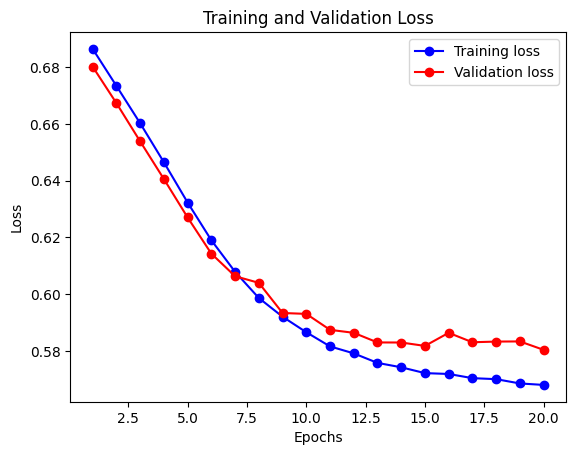

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Test Set Performance Metrics:
Accuracy: 0.6800
Precision: 0.6887
Recall: 0.6499
F1-score: 0.6687

Confusion Matrix:
[[1071  438]
 [ 522  969]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6723    0.7097    0.6905      1509
           1     0.6887    0.6499    0.6687      1491

    accuracy                         0.6800      3000
   macro avg     0.6805    0.6798    0.6796      3000
weighted avg     0.6805    0.6800    0.6797      3000



In [ ]:
# Input dimension from TF-IDF features
input_dim = X_train_tfidf.shape[1]

# Define simple neural network model
def simple_nn_model(input_dim):
    model = Sequential()
    # Input layer + one hidden layer
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile model using default optimizer (Adam), default learning rate, no early stopping
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
model = simple_nn_model(input_dim)

# Train the model (no callbacks, default optimizer, verbose=2 for epoch info)
history = model.fit(
    X_train_tfidf, y_train,
    validation_data=(X_val_tfidf, y_val),
    epochs=20,
    batch_size=32,
    verbose=2
)

model.save('saved_models/simple_nn_model.keras')
print("Keras model saved as 'saved_models/simple_nn_model.keras'")

# Function to print final accuracy and plot loss curve (reuse if you have it)
def print_final_accuracy(history):
    train_acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')
    print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")

import matplotlib.pyplot as plt

def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Print accuracy and plot loss curve
print_final_accuracy(history)
loss_curve_plot(history)

# Evaluate on test set
y_test_prob = model.predict(X_test_tfidf)
y_test_pred = (y_test_prob > 0.5).astype(int).flatten()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Performance Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

In [ ]:
# Define a smaller hyperparameter grid for faster tuning
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_tfidf, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_

# Save the model to a pickle file
with open('saved_models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("XGBoost model saved as 'saved_models/xgb_model.pkl'")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:02:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best F1 score: 0.9941
XGBoost model saved as 'saved_models/xgb_model.pkl'


#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
# Define a flexible model function supporting optimization and regularization
def define_model(optimization='adam',
                 regularization_datatype=None,
                 early_stopping=True,
                 dropout=0.3,
                 learning_rate=0.001,
                 num_layers=3,
                 units_per_layer=[128, 64, 32],
                 input_dim=None):
    """
    Defines and compiles a Keras Sequential model with specified optimizer, regularization, dropout, batch normalization, and early stopping.

    Parameters:
    - optimization (str): 'adam' or 'rmsprop'
    - regularization_datatype (str or None): 'l1', 'l2', 'l1_l2', or None
    - early_stopping (bool): Whether to use EarlyStopping callback during training
    - dropout (float): Dropout rate between 0 and 1
    - learning_rate (float): Learning rate for the optimizer
    - num_layers (int): Number of hidden layers
    - units_per_layer (list of int): Number of units in each hidden layer
    - input_dim (int): Number of features in input data (required for first layer)

    Returns:
    - model (keras.Model): Compiled Keras model
    - callbacks (list): List of callbacks to use during training (empty if early_stopping=False)
    """

    # Setup regularizer
    if regularization_datatype == 'l1':
        regularizer = l1(0.01)
    elif regularization_datatype == 'l2':
        regularizer = l2(0.01)
    elif regularization_datatype == 'l1_l2':
        regularizer = l1_l2(l1=0.01, l2=0.01)
    else:
        regularizer = None

    # Choose optimizer
    if optimization is None or optimization.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimization.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Choose 'adam' or 'rmsprop'.")

    model = Sequential()
    # Input + first hidden layer
    model.add(Dense(units_per_layer[0], activation='relu', kernel_regularizer=regularizer, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    # Additional hidden layers
    for i in range(1, num_layers - 1):
        model.add(Dense(units_per_layer[i], activation='relu', kernel_regularizer=regularizer))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    return model, callbacks

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
# Function to plot loss curves
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Performance on Test Set:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [ ]:
# Train and evaluate multiple optimized models with different configurations

# Common variables
input_dim = X_train_tfidf.shape[1]
epochs = 20
batch_size = 32

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 - 6s - 14ms/step - accuracy: 0.6353 - loss: 0.6562 - val_accuracy: 0.5342 - val_loss: 0.7446
Epoch 2/20
438/438 - 2s - 4ms/step - accuracy: 0.6876 - loss: 0.5930 - val_accuracy: 0.6738 - val_loss: 0.6053
Epoch 3/20
438/438 - 2s - 5ms/step - accuracy: 0.6948 - loss: 0.5785 - val_accuracy: 0.6791 - val_loss: 0.6014
Epoch 4/20
438/438 - 3s - 6ms/step - accuracy: 0.7014 - loss: 0.5718 - val_accuracy: 0.6714 - val_loss: 0.6072
Epoch 5/20
438/438 - 3s - 6ms/step - accuracy: 0.7111 - loss: 0.5641 - val_accuracy: 0.6791 - val_loss: 0.6019
Epoch 6/20
438/438 - 1s - 3ms/step - accuracy: 0.7128 - loss: 0.5571 - val_accuracy: 0.6851 - val_loss: 0.6079
Epoch 7/20
438/438 - 3s - 7ms/step - accuracy: 0.7223 - loss: 0.5486 - val_accuracy: 0.6784 - val_loss: 0.6043
Epoch 8/20
438/438 - 2s - 5ms/step - accuracy: 0.7201 - loss: 0.5461 - val_accuracy: 0.6791 - val_loss: 0.6109
Epoch 9/20
438/438 - 2s - 5ms/step - accuracy: 0.7220 - loss: 0.5398 - val_accuracy: 0.6721 - val_loss: 0.6179
Epoch 10/20

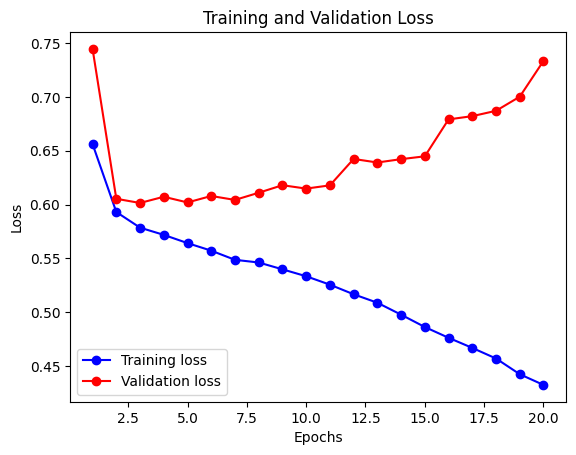

In [ ]:
# Instance 1: Adam optimizer, no regularization, no early stopping, no dropout (baseline optimized)
model_1, callbacks_1 = define_model(optimization='adam', regularization_datatype=None, early_stopping=False,
                                    dropout=0.0, learning_rate=0.001, num_layers=5,
                                    units_per_layer=[256, 128, 64, 32, 16], input_dim=input_dim)
history_1 = model_1.fit(X_train_tfidf, y_train, validation_data=(X_val_tfidf, y_val), epochs=epochs,
                        batch_size=batch_size, verbose=2, callbacks=callbacks_1)
y_pred_prob_1 = model_1.predict(X_test_tfidf)
y_pred_1 = (y_pred_prob_1 > 0.5).astype(int).flatten()
print_evaluation_metrics(y_test, y_pred_1, "Model 1 (Adam, no reg, no early stopping)")
loss_curve_plot(history_1)

model_1.save('saved_models/model_1_adam_no_reg.keras')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 - 6s - 13ms/step - accuracy: 0.6022 - loss: 2.3616 - val_accuracy: 0.5038 - val_loss: 1.6173
Epoch 2/20
438/438 - 2s - 4ms/step - accuracy: 0.6463 - loss: 1.1414 - val_accuracy: 0.6618 - val_loss: 0.8642
Epoch 3/20
438/438 - 3s - 7ms/step - accuracy: 0.6744 - loss: 0.7503 - val_accuracy: 0.6738 - val_loss: 0.6719
Epoch 4/20
438/438 - 2s - 5ms/step - accuracy: 0.6858 - loss: 0.6493 - val_accuracy: 0.6858 - val_loss: 0.6250
Epoch 5/20
438/438 - 3s - 6ms/step - accuracy: 0.6809 - loss: 0.6305 - val_accuracy: 0.6881 - val_loss: 0.6208
Epoch 6/20
438/438 - 2s - 5ms/step - accuracy: 0.6835 - loss: 0.6240 - val_accuracy: 0.6934 - val_loss: 0.6093
Epoch 7/20
438/438 - 1s - 3ms/step - accuracy: 0.6836 - loss: 0.6207 - val_accuracy: 0.6838 - val_loss: 0.6119
Epoch 8/20
438/438 - 1s - 3ms/step - accuracy: 0.6841 - loss: 0.6179 - val_accuracy: 0.6948 - val_loss: 0.6116
Epoch 9/20
438/438 - 3s - 7ms/step - accuracy: 0.6832 - loss: 0.6180 - val_accuracy: 0.6944 - val_loss: 0.6003
Epoch 10/20

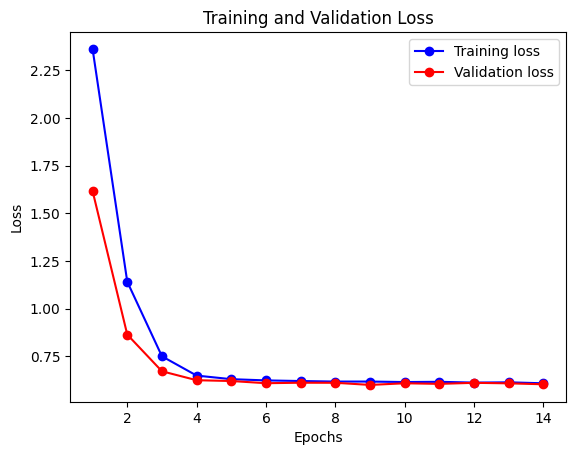

In [ ]:
# Instance 2: RMSprop optimizer, L2 regularization, early stopping, dropout 0.3
model_2, callbacks_2 = define_model(optimization='rmsprop', regularization_datatype='l2', early_stopping=True,
                                    dropout=0.3, learning_rate=0.001, num_layers=4,
                                    units_per_layer=[256, 128, 64, 32], input_dim=input_dim)
history_2 = model_2.fit(X_train_tfidf, y_train, validation_data=(X_val_tfidf, y_val), epochs=epochs,
                        batch_size=batch_size, verbose=2, callbacks=callbacks_2)
y_pred_prob_2 = model_2.predict(X_test_tfidf)
y_pred_2 = (y_pred_prob_2 > 0.5).astype(int).flatten()
print_evaluation_metrics(y_test, y_pred_2, "Model 2 (RMSprop, L2, early stopping, dropout)")
loss_curve_plot(history_2)

model_2.save('saved_models/model_2_rmsprop_l2_earlystop_dropout.keras')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 - 3s - 8ms/step - accuracy: 0.5332 - loss: 4.0354 - val_accuracy: 0.5998 - val_loss: 2.9908
Epoch 2/20
438/438 - 1s - 3ms/step - accuracy: 0.5601 - loss: 2.5078 - val_accuracy: 0.6455 - val_loss: 1.9320
Epoch 3/20
438/438 - 1s - 3ms/step - accuracy: 0.5969 - loss: 1.6302 - val_accuracy: 0.6441 - val_loss: 1.2916
Epoch 4/20
438/438 - 1s - 3ms/step - accuracy: 0.6250 - loss: 1.1068 - val_accuracy: 0.6361 - val_loss: 0.9211
Epoch 5/20
438/438 - 1s - 3ms/step - accuracy: 0.6514 - loss: 0.8176 - val_accuracy: 0.6325 - val_loss: 0.7466
Epoch 6/20
438/438 - 1s - 3ms/step - accuracy: 0.6635 - loss: 0.6947 - val_accuracy: 0.6578 - val_loss: 0.6649
Epoch 7/20
438/438 - 2s - 4ms/step - accuracy: 0.6715 - loss: 0.6596 - val_accuracy: 0.6804 - val_loss: 0.6362
Epoch 8/20
438/438 - 2s - 5ms/step - accuracy: 0.6680 - loss: 0.6513 - val_accuracy: 0.6861 - val_loss: 0.6244
Epoch 9/20
438/438 - 2s - 5ms/step - accuracy: 0.6718 - loss: 0.6458 - val_accuracy: 0.6841 - val_loss: 0.6204
Epoch 10/20


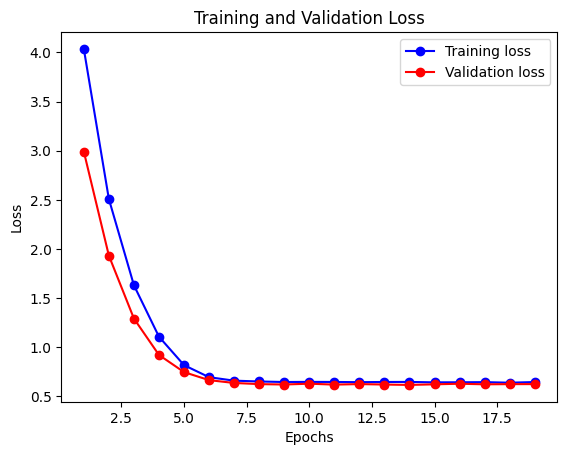

In [ ]:
# Instance 3: Adam optimizer, L1 regularization, early stopping, dropout 0.5, learning rate 0.0005
model_3, callbacks_3 = define_model(optimization='adam', regularization_datatype='l1', early_stopping=True,
                                    dropout=0.5, learning_rate=0.0005, num_layers=3,
                                    units_per_layer=[64, 32, 16], input_dim=input_dim)
history_3 = model_3.fit(X_train_tfidf, y_train, validation_data=(X_val_tfidf, y_val), epochs=epochs,
                        batch_size=batch_size, verbose=2, callbacks=callbacks_3)
y_pred_prob_3 = model_3.predict(X_test_tfidf)
y_pred_3 = (y_pred_prob_3 > 0.5).astype(int).flatten()
print_evaluation_metrics(y_test, y_pred_3, "Model 3 (Adam, L1, early stopping, dropout, lr=0.0005)")
loss_curve_plot(history_3)

model_3.save('saved_models/model_3_adam_l1_earlystop_dropout.keras')

Epoch 1/20
438/438 - 5s - 12ms/step - accuracy: 0.5457 - loss: 16.3900 - val_accuracy: 0.5032 - val_loss: 5.8895
Epoch 2/20
438/438 - 2s - 5ms/step - accuracy: 0.6130 - loss: 3.0299 - val_accuracy: 0.6668 - val_loss: 1.5406
Epoch 3/20
438/438 - 2s - 4ms/step - accuracy: 0.6383 - loss: 1.1581 - val_accuracy: 0.6081 - val_loss: 1.0023
Epoch 4/20
438/438 - 3s - 6ms/step - accuracy: 0.6628 - loss: 0.9065 - val_accuracy: 0.6654 - val_loss: 0.8934
Epoch 5/20
438/438 - 2s - 4ms/step - accuracy: 0.6710 - loss: 0.8661 - val_accuracy: 0.6554 - val_loss: 0.8828
Epoch 6/20
438/438 - 2s - 4ms/step - accuracy: 0.6715 - loss: 0.8537 - val_accuracy: 0.6868 - val_loss: 0.8231
Epoch 7/20
438/438 - 3s - 6ms/step - accuracy: 0.6720 - loss: 0.8476 - val_accuracy: 0.6828 - val_loss: 0.8350
Epoch 8/20
438/438 - 3s - 6ms/step - accuracy: 0.6712 - loss: 0.8441 - val_accuracy: 0.6754 - val_loss: 0.8365
Epoch 9/20
438/438 - 2s - 4ms/step - accuracy: 0.6730 - loss: 0.8495 - val_accuracy: 0.6838 - val_loss: 0.8256

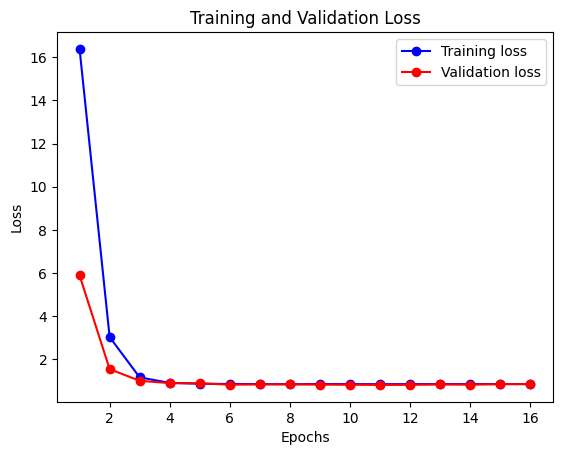

In [ ]:
# Instance 4: RMSprop optimizer, L1_L2 regularization, early stopping, dropout 0.4, learning rate 0.0007, 3 layers
model_4, callbacks_4 = define_model(
    optimization='rmsprop',
    regularization_datatype='l1_l2',
    early_stopping=True,
    dropout=0.4,
    learning_rate=0.0007,
    num_layers=5,
    units_per_layer=[256, 128, 64, 32, 16],
    input_dim=input_dim
)

history_4 = model_4.fit(
    X_train_tfidf, y_train,
    validation_data=(X_val_tfidf, y_val),
    epochs=20,
    batch_size=32,
    verbose=2,
    callbacks=callbacks_4
)

y_pred_prob_4 = model_4.predict(X_test_tfidf)
y_pred_4 = (y_pred_prob_4 > 0.5).astype(int).flatten()

print_evaluation_metrics(y_test, y_pred_4, "Model 4 (RMSprop, L1_L2, early stopping, dropout 0.4, lr=0.0007)")
loss_curve_plot(history_4)

model_4.save('saved_models/model_4_rmsprop_l1l2_earlystop_dropout.keras')

In [ ]:
results_data = {
    'Training Instance': ['Instance 1', 'Instance 2', 'Instance 3', 'Instance 4', 'Instance 5 (Opt.)'],
    'Optimizer Used': ['Adam', 'RMSprop', 'Adam', 'RMSprop', 'TBD'],
    'Regularizer Used': ['None', 'L2', 'L1', 'L1_L2', 'TBD'],
    'Epochs': [20, 20, 20, 20, 'TBD'],
    'Early Stopping': ['No', 'Yes', 'Yes', 'Yes', 'TBD'],
    'Number of Layers': [2, 3, 2, 3, 'TBD'],
    'Learning Rate': [0.001, 0.001, 0.0005, 0.0007, 'TBD'],
    'Accuracy': [0.6463, 0.6840, 0.6900, 0.6787, 'TBD'],
    'F1 Score': [0.6289, 0.6643, 0.6877, 0.6550, 'TBD'],
    'Recall': [0.6030, 0.6291, 0.6868, 0.6137, 'TBD'],
    'Precision': [0.6572, 0.7037, 0.6886, 0.7022, 'TBD']
}

results_df = pd.DataFrame(results_data)

# Apply border style
styled_table = results_df.style.set_table_styles(
    [{'selector': '', 'props': [('border', '1px solid black')]}]
).set_properties(**{'border': '1px solid white'})

styled_table

,Training Instance,Optimizer Used,Regularizer Used,Epochs,Early Stopping,Number of Layers,Learning Rate,Accuracy,F1 Score,Recall,Precision
0,Instance 1,Adam,None,20,No,2,0.001000,0.646300,0.628900,0.603000,0.657200
1,Instance 2,RMSprop,L2,20,Yes,3,0.001000,0.684000,0.664300,0.629100,0.703700
2,Instance 3,Adam,L1,20,Yes,2,0.000500,0.690000,0.687700,0.686800,0.688600
3,Instance 4,RMSprop,L1_L2,20,Yes,3,0.000700,0.678700,0.655000,0.613700,0.702200
4,Instance 5 (Opt.),TBD,TBD,TBD,TBD,TBD,TBD,TBD,TBD,TBD,TBD


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Confusion Matrix for Model 1 (Adam, no reg, no early stopping):
[[1040  469]
 [ 592  899]]
F1 Score for Model 1 (Adam, no reg, no early stopping): 0.6289


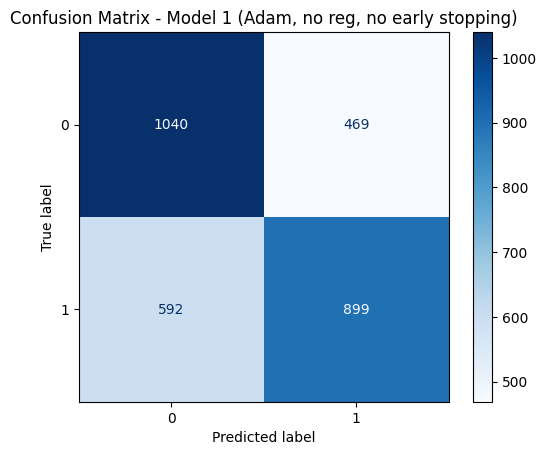

Confusion Matrix for Model 2 (RMSprop, L2, early stopping, dropout):
[[1114  395]
 [ 553  938]]
F1 Score for Model 2 (RMSprop, L2, early stopping, dropout): 0.6643


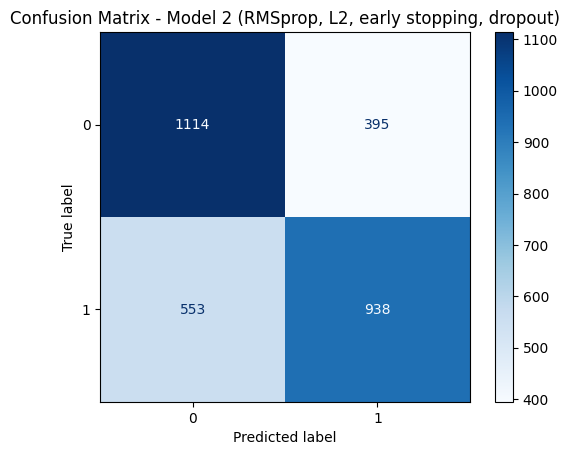

In [ ]:
def plot_confusion_and_f1(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Confusion Matrix for {model_name}:\n{cm}")
    print(f"F1 Score for {model_name}: {f1:.4f}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example usage:
plot_confusion_and_f1(y_test, y_pred_1, "Model 1 (Adam, no reg, no early stopping)")
plot_confusion_and_f1(y_test, y_pred_2, "Model 2 (RMSprop, L2, early stopping, dropout)")


Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):
    """
    Load a saved Keras model and make binary predictions on input data X.

    Parameters:
    - model_path (str): Path to the saved Keras model file (.keras or .h5)
    - X (array-like): Input features for prediction

    Returns:
    - predictions (np.ndarray): Binary predictions (0 or 1)
    """
    # Load the model
    model = load_model(model_path)

    # Make probability predictions
    prob_predictions = model.predict(X)

    # Convert probabilities to binary labels (threshold 0.5)
    predictions = (prob_predictions > 0.5).astype(int).flatten()

    return predictions

In [ ]:
model_path = '/content/saved_models/model_3_adam_l1_earlystop_dropout.keras'

try:
    preds = make_predictions(model_path, X_test_tfidf)
    print("Predictions made successfully.")
except ValueError as e:
    print(f"Error: {e}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predictions made successfully.


Congratulations!!
